<a href="https://colab.research.google.com/github/jrahemtulla/1.125project/blob/main/Project1_125.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from __future__ import division
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical
from sklearn.utils import class_weight
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train_df=pd.read_csv('/content/gdrive/MyDrive/1.125 /mitbih_train.csv',header=None)
test_df=pd.read_csv('/content/gdrive/MyDrive/1.125 /mitbih_train.csv',header=None)

In [ ]:
train_df[187]=train_df[187].astype(int)
equilibre=train_df[187].value_counts()
print(equilibre)

0    72471
4     6431
2     5788
1     2223
3      641
Name: 187, dtype: int64


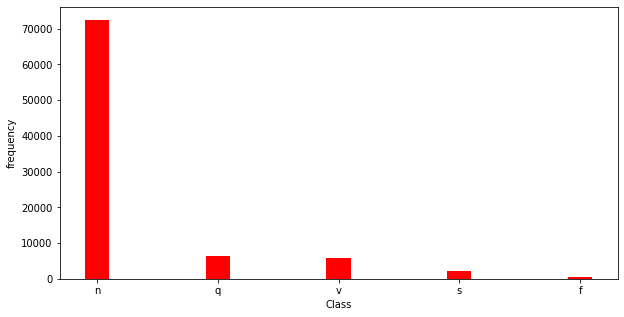

In [ ]:
labels=['n','q','v','s','f']
plt.figure(figsize=(10,5))
plt.bar(labels, equilibre, color='red',
        width = 0.2)

plt.xlabel ("Class")
plt.ylabel ('frequency')
plt.show()


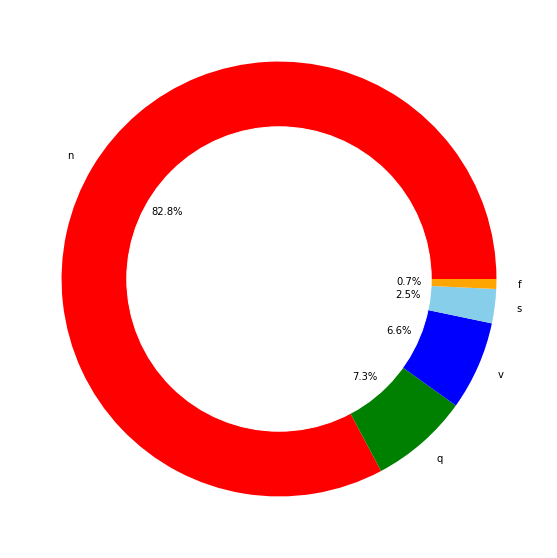

In [ ]:
#0= N : Non-ecotic beats (normal beat) 1=S : Supraventricular ectopic beats 2=V : Ventricular ectopic beats 3=F : Fusion Beats 4=Q : Unknown Beats

plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(equilibre, labels=['n','q','v','s','f'], colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [ ]:
#Data is unbalanced with many more normal beat samples than others. Therefore resampling is needed to balance the dataset
from sklearn.utils import resample
df_1=train_df[train_df[187]==1]
df_2=train_df[train_df[187]==2]
df_3=train_df[train_df[187]==3]
df_4=train_df[train_df[187]==4]
df_0=(train_df[train_df[187]==0]).sample(n=20000,random_state=42)

df_1_upsample=resample(df_1,replace=True,n_samples=20000,random_state=123)
df_2_upsample=resample(df_2,replace=True,n_samples=20000,random_state=124)
df_3_upsample=resample(df_3,replace=True,n_samples=20000,random_state=125)
df_4_upsample=resample(df_4,replace=True,n_samples=20000,random_state=126)

train_df=pd.concat([df_0,df_1_upsample,df_2_upsample,df_3_upsample,df_4_upsample])

In [ ]:
equilibre=train_df[187].value_counts()
print(equilibre)

0    20000
1    20000
2    20000
3    20000
4    20000
Name: 187, dtype: int64


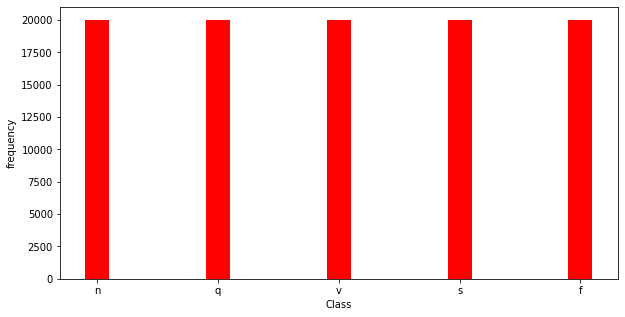

In [ ]:
labels=['n','q','v','s','f']
plt.figure(figsize=(10,5))
plt.bar(labels, equilibre, color='red',
        width = 0.2)

plt.xlabel ("Class")
plt.ylabel ('frequency')
plt.show()

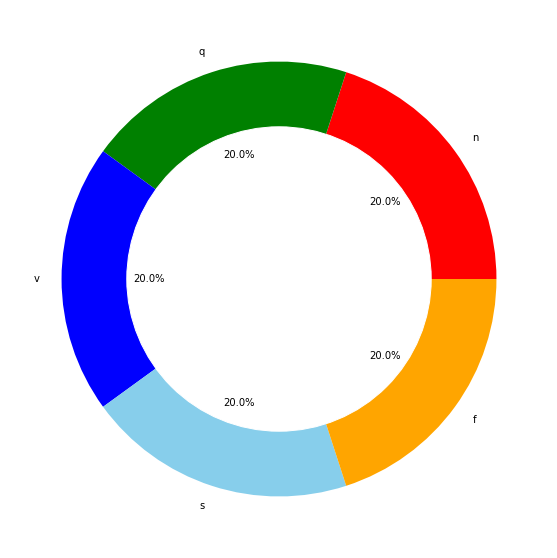

In [ ]:
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(equilibre, labels=['n','q','v','s','f'], colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [ ]:
c= train_df.groupby(187, group_keys = False).apply(lambda train_df: train_df.sample(1))

In [ ]:
c

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
56450,1.00000,0.793722,0.170404,0.067265,0.165919,0.139013,0.085202,0.085202,0.062780,0.058296,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
72670,0.98254,0.933333,0.365079,0.023810,0.247619,0.306349,0.307937,0.323810,0.317460,0.311111,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
80049,0.00000,0.060000,0.204211,0.324211,0.337895,0.342105,0.373684,0.389474,0.400000,0.398947,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
80763,1.00000,0.824468,0.297872,0.147163,0.106383,0.106383,0.081560,0.085106,0.076241,0.081560,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
86652,1.00000,0.832536,0.741627,0.741627,0.693780,0.655502,0.607656,0.526316,0.440191,0.277512,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


Text(0, 0.5, 'Amplitude')

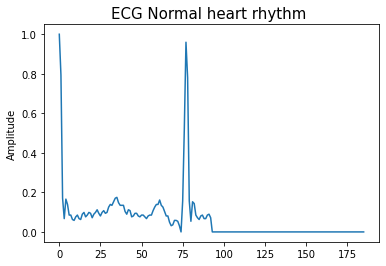

In [ ]:
#Plot normal heart beats 
plt.plot(c.iloc[0,:186])
plt.title("ECG Normal heart rhythm ", fontsize=15)
plt.ylabel("Amplitude", fontsize=10)

Text(0, 0.5, 'Amplitude')

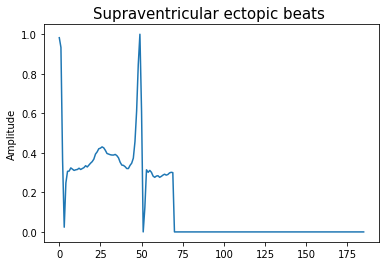

In [ ]:
#Plot Supraventricular ectopic beats
plt.plot(c.iloc[1,:186])
plt.title("Supraventricular ectopic beats ", fontsize=15)
plt.ylabel("Amplitude", fontsize=10)

Text(0, 0.5, 'Amplitude')

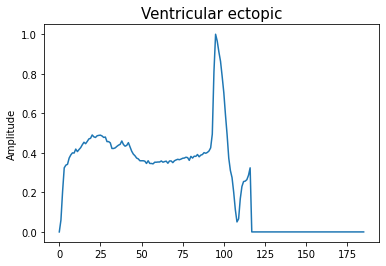

In [ ]:
#Plot Ventricular ectopic
plt.plot(c.iloc[2,:186])
plt.title("Ventricular ectopic", fontsize=15)
plt.ylabel("Amplitude", fontsize=10)


Text(0, 0.5, 'Amplitude')

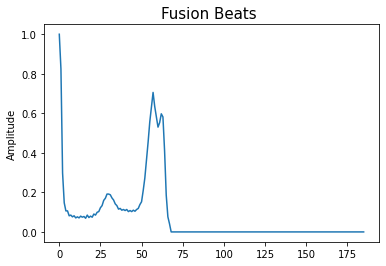

In [ ]:
#Plot Fusion Beats 
plt.plot(c.iloc[3,:186])
plt.title("Fusion Beats ", fontsize=15)
plt.ylabel("Amplitude", fontsize=10)

Text(0, 0.5, 'Amplitude')

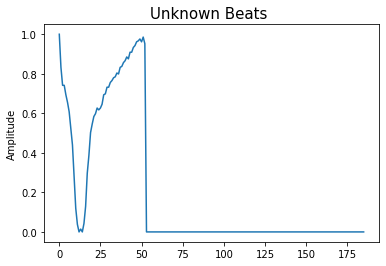

In [ ]:
#Plot Unknown Beat
plt.plot(c.iloc[4,:186])
plt.title("Unknown Beats ", fontsize=15)
plt.ylabel("Amplitude", fontsize=10)

In [ ]:
#transform the data, adding noise to prevent the model from overfitting
def add_gaussian_noise(signal):
  noise = np.random.normal(0,0.5,186)
  return(signal+noise)

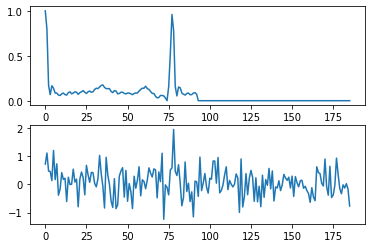

In [ ]:
tempo = c.iloc [0, :186]
bruiter = add_gaussian_noise(tempo)

plt.subplot(2,1,1)
plt.plot(c.iloc[0,:186])

plt.subplot(2,1,2)
plt.plot(bruiter)

plt.show()

In [ ]:
target_train=train_df[187]
target_test=test_df[187]
y_train=to_categorical(target_train)
y_test=to_categorical(target_test)

In [ ]:
#adding gaussian noise to the entire training dataset
X_train=train_df.iloc[:,:186].values
X_test=test_df.iloc[:,:186].values
for i in range(len(X_train)):
    X_train[i,:186]= add_gaussian_noise(X_train[i,:186])
X_train = X_train.reshape(len(X_train), X_train.shape[1],1)
X_test = X_test.reshape(len(X_test), X_test.shape[1],1)

In [ ]:
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, AvgPool1D, Flatten, Dense, Dropout, Softmax
from keras.optimizers import Adam 
from keras.utils.np_utils import to_categorical
from keras.utils.vis_utils import plot_model
from keras import regularizers


In [ ]:
#creating a CNN - 3 convolutional layers 
def network(X_train,y_train,X_test,y_test):
    

    im_shape=(X_train.shape[1],1)
    inputs_cnn=Input(shape=(im_shape), name='inputs_cnn')
    conv1_1=Convolution1D(64, (6), activation='relu', input_shape=im_shape)(inputs_cnn)
    pool1=MaxPool1D(pool_size=(3), strides=(2), padding="same")(conv1_1)
    conv2_1=Convolution1D(64, (3), activation='relu', input_shape=im_shape)(pool1)
    pool2=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv2_1)
    conv3_1=Convolution1D(64, (3), activation='relu', input_shape=im_shape)(pool2)
    pool3=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv3_1)
    flatten=Flatten()(pool3)
    dense_end1 = Dense(64, activation='relu')(flatten)
    dense_end2 = Dense(32, activation='relu')(dense_end1)
    main_output = Dense(5, activation='softmax', name='main_output')(dense_end2)

    model = Model(inputs= inputs_cnn, outputs=main_output)
    model.compile(optimizer='adam', loss='categorical_crossentropy',metrics = ['accuracy'])

    history=model.fit(X_train, y_train,epochs=4, batch_size=32,validation_data=(X_test,y_test))

    return(model,history)
    
  

In [ ]:
def evaluate_model(history,X_test,y_test,model):
    scores = model.evaluate((X_test),y_test, verbose=0)
    print("Accuracy: %.2f%%" % (scores[1]*100))
    
    print(history)
    fig1, ax_acc = plt.subplots()
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Model - Accuracy')
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()
    
    fig2, ax_loss = plt.subplots()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Model- Loss')
    plt.legend(['Training', 'Validation'], loc='upper right')
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.show()
    target_names=['0','1','2','3','4']
    
    y_true=[]
    for element in y_test:
        y_true.append(np.argmax(element))
    prediction_proba=model.predict(X_test)
    prediction=np.argmax(prediction_proba,axis=1)
    cnf_matrix = confusion_matrix(y_true, prediction)

In [ ]:
from keras.layers import Dense, Convolution1D, MaxPool1D, Flatten, Dropout
from keras.layers import Input
from keras.models import Model
import keras
from keras.callbacks import EarlyStopping, ModelCheckpoint

model,history=network(X_train,y_train,X_test,y_test)


Epoch 1/4
3125/3125 [==============================] - 103s 33ms/step - loss: 0.9066 - accuracy: 0.6510 - val_loss: 0.8788 - val_accuracy: 0.7363
Epoch 2/4
3125/3125 [==============================] - 104s 33ms/step - loss: 0.8046 - accuracy: 0.6950 - val_loss: 0.9198 - val_accuracy: 0.6936
Epoch 3/4
3125/3125 [==============================] - 103s 33ms/step - loss: 0.7684 - accuracy: 0.7085 - val_loss: 0.7997 - val_accuracy: 0.7560
Epoch 4/4
3125/3125 [==============================] - 100s 32ms/step - loss: 0.7452 - accuracy: 0.7184 - val_loss: 0.7947 - val_accuracy: 0.7212


Accuracy: 75.55%


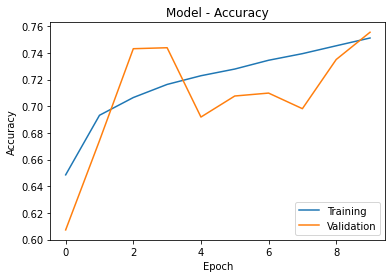

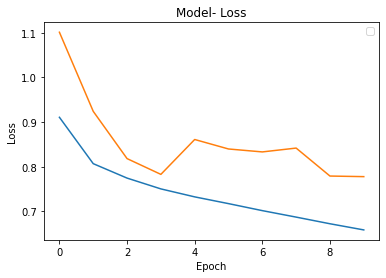

2737/2737 [==============================] - 22s 8ms/step


In [ ]:
evaluate_model(history,X_test,y_test,model)
y_pred=model.predict(X_test)

In [ ]:
import itertools
def confusion_matrix(cm , classes,
                     normalize = False,
                     title = 'Confusion matrix', 
                     cmap = plt.cm.Purples):
  
  if
